# NLP CLASSIFICATION & SENTIMENT ANALYSIS

### Bu projede Las Vegasta bir restorant olan Bacchanal Buffet'ı internette hakkında yapılan yorumlara göre, müşteriler nelerden memnun nelerden memnun değil öğreneceğiz. Sonrasında ise elimizdeki verileri görselleştirerek ve NLP tekniklerini kullanarak restoran müşterilere daha iyi hizmet kalitesi verebilmek için ne yapmalı onu bulacağız.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import langdetect
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('restaurant.csv')

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
import langdetect

# Dil tespiti ve İngilizce olmayan yorumların çıkarılması
df['language'] = df['text'].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")
df = df[df['language'] == 'en']

In [5]:
df = df[['stars','useful','funny','cool', 'text']]

In [6]:
df.head()

,stars,useful,funny,cool,text
0,5,0,1,0,After getting food poisoning at the Palms hote...
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,1,1,1,The crab legs are better than the ones at Wick...
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...
4,5,0,0,0,I would give this infinite stars if I could. M...


In [7]:
import seaborn as sns

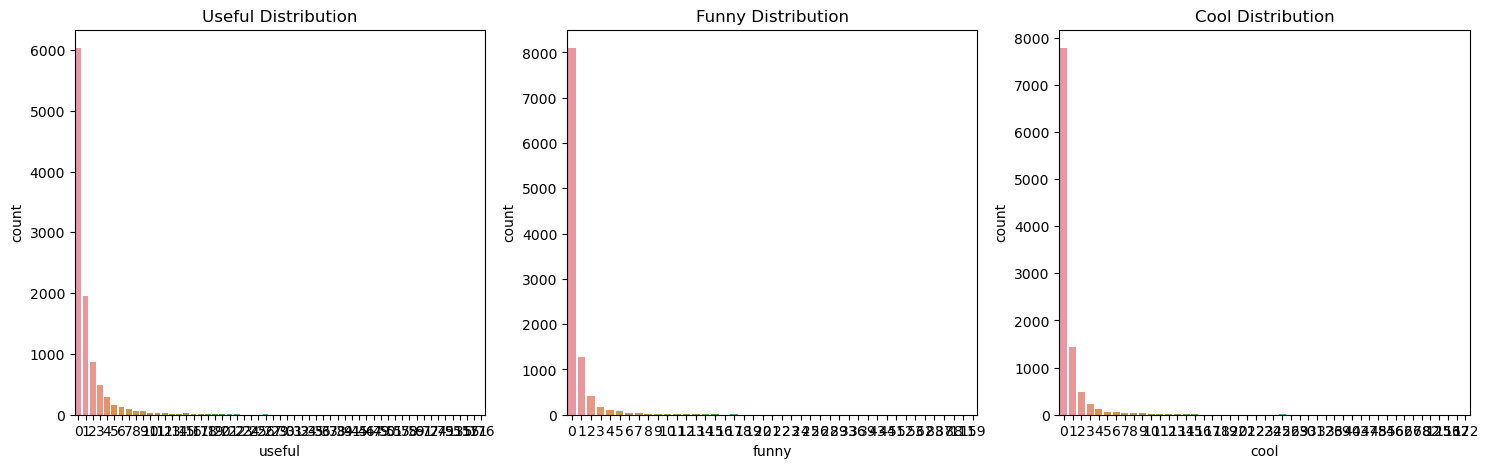

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], x='useful', data=df)
axes[0].set_title('Useful Distribution')
sns.countplot(ax=axes[1], x='funny', data=df)
axes[1].set_title('Funny Distribution')
sns.countplot(ax=axes[2], x='cool', data=df)
axes[2].set_title('Cool Distribution')
plt.show()

In [9]:
df.shape

(10373, 5)

In [10]:
df['stars'].value_counts()

stars
5    4226
4    2626
3    1557
1    1051
2     913
Name: count, dtype: int64

In [11]:
df['useful'].value_counts()

useful
0      6032
1      1954
2       875
3       482
4       287
5       162
6       127
7        87
8        62
9        58
10       33
12       32
15       21
11       21
13       19
16       16
14       14
17       10
18        9
19        8
20        5
26        5
22        4
21        4
27        3
34        3
35        2
29        2
24        2
49        2
25        2
74        2
31        2
30        2
39        2
38        1
45        1
176       1
23        1
50        1
32        1
61        1
37        1
36        1
41        1
51        1
47        1
171       1
135       1
95        1
72        1
46        1
75        1
57        1
58        1
59        1
155       1
Name: count, dtype: int64

In [12]:
df['text'][1]

'"A feast worthy of Gods"\n\nBaccarnal Buffet in Caesar Palace is consider the best buffet in the Las Vegas by most food critics   It rated highest in trip advisor and yelp for a buffet restaurant in Vegas.  I was only going to eat Buffet once in this trip, so I decided must try the best there is available.  My review is based on late breakfast and lunch during a non-holiday weekday.  Finding this place is confusing and take more than five minutes from the main entrance to get here, this is common in most buffet in the strip.  \n\nAdmission Price\n*Breakfast (Monday - Friday, 7 a.m. - 11 a.m.): $25.99\n*Brunch (Saturday - Sunday, 8 a.m. - 3 p.m.): $40.99\n* Lunch (Monday - Friday, 11 a.m. - 3 p.m.): $32.99\n* Dinner (Daily, 3 p.m. - 10 p.m.): $45.99 on weekdays, $50.99 on weekends \n* Holiday expect to paid $10 more.\n* Total Reward Card Holder gets $1 off.\n* Price not included the 8.1% sales tax.\n\nAtmosphere\nThe interior is similar to those of mid-level restaurant, they claim it c

In [13]:
df['text'] = df['text'].str.lower()

In [14]:
df['text'] = df['text'].str.replace(r"'", "") \
                       .str.replace(r'\\', '') \
                       .str.replace(r'[^\w\s]', ' ', regex=True) \
                       .str.replace(r'\s+', ' ', regex=True)

In [15]:
df['text'] = df['text'].str.replace('[\d+]', '', regex=True)

In [16]:
yelpbw = df[(df.stars==1)|(df.stars ==5)]

In [17]:
yelpbw.reset_index(drop= True, inplace = True)

In [18]:
yelpbw.head()

,stars,useful,funny,cool,text
0,5,0,1,0,after getting food poisoning at the palms hote...
1,1,0,0,0,not worth it too salty food and expensive this...
2,5,0,0,0,i would give this infinite stars if i could my...
3,5,0,0,0,really enjoyed everything they had to offer it...
4,5,0,0,0,lots of choices good service line wasnt as lon...


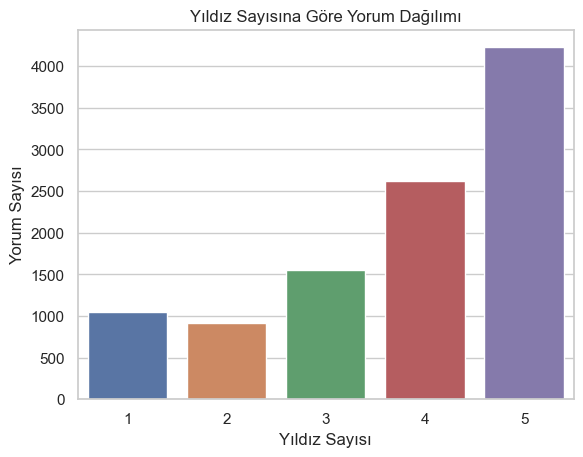

In [19]:
sns.set(style="whitegrid")
sns.countplot(x='stars', data=df)
plt.title('Yıldız Sayısına Göre Yorum Dağılımı')
plt.xlabel('Yıldız Sayısı')
plt.ylabel('Yorum Sayısı')
plt.show()

In [20]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
def wc(data, bgcolor):
    plt.figure(figsize =(10,10))
    mask = np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color= bgcolor, stopwords= STOPWORDS, mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [22]:
positive_reviews = df[df['stars'] == 5]['text']
negative_reviews = df[df['stars'] == 1]['text']

In [23]:
positive_reviews.count()

4226

In [24]:
negative_reviews.count()

1051

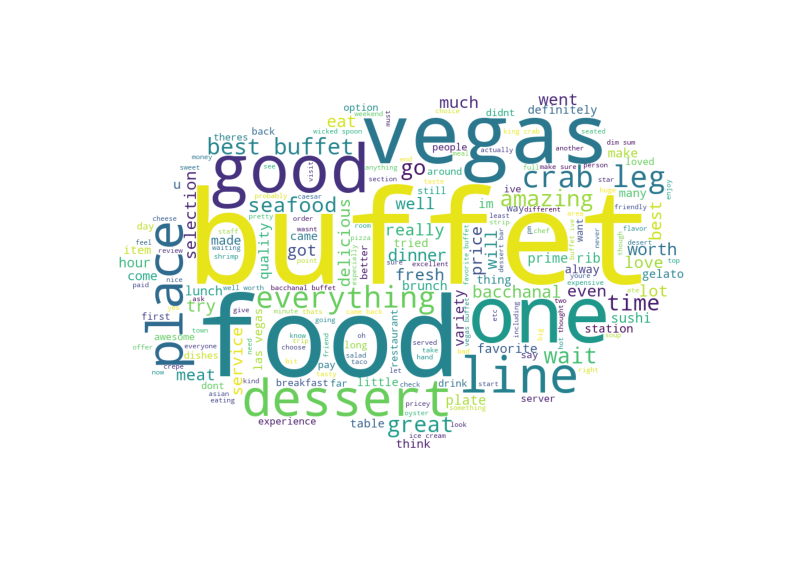

In [25]:
wc(positive_reviews, 'white')

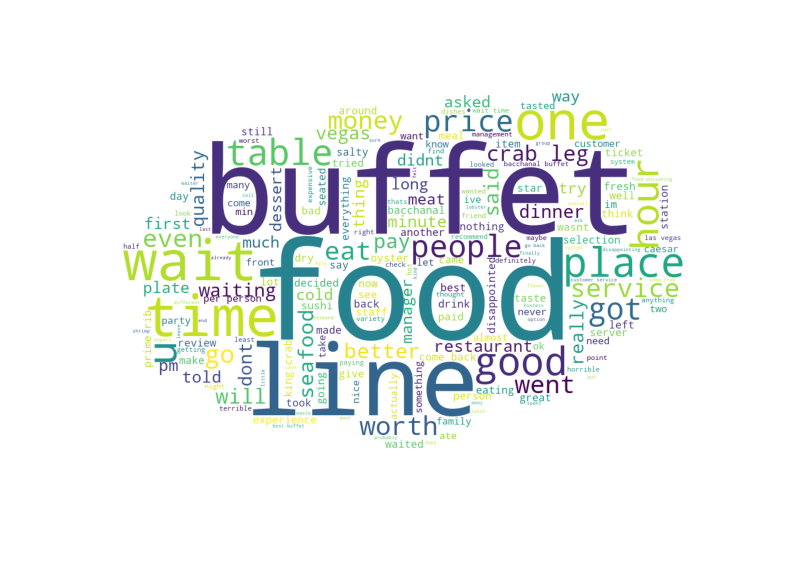

In [26]:
wc(negative_reviews, 'white')

In [27]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
# Duygu skorunu hesaplama ve yorumları sınıflandırma
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'negative' if x < 0 else ('neutral' if x == 0 else 'positive'))

# Olumsuz yorumları filtrele
negative_reviews = df[df['sentiment'] == 'negative']['text']
positive_reviews = df[df['sentiment'] == 'positive']['text']

In [28]:
def get_top_n_words(corpus, n=None, gram=1):
    vec = CountVectorizer(ngram_range=(gram, gram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

# En sık geçen 15 kelimeyi, 2-gram ve 3-gramları buluyoruz.
top_words_negative = get_top_n_words(negative_reviews, 15)
top_two_words_negative = get_top_n_words(negative_reviews, 15, 2)
top_three_words_negative = get_top_n_words(negative_reviews, 15, 3)

top_words_positive = get_top_n_words(positive_reviews, 15)
top_two_words_positive = get_top_n_words(positive_reviews, 15, 2)
top_three_words_positive = get_top_n_words(positive_reviews, 15, 3)

In [29]:
top_words_negative

[('food', 1034),
 ('buffet', 860),
 ('line', 542),
 ('wait', 470),
 ('crab', 437),
 ('time', 418),
 ('just', 345),
 ('like', 335),
 ('good', 290),
 ('service', 277),
 ('worth', 274),
 ('place', 259),
 ('legs', 258),
 ('price', 253),
 ('got', 241)]

In [30]:
top_two_words_negative

[('crab legs', 244),
 ('prime rib', 108),
 ('king crab', 85),
 ('wicked spoon', 64),
 ('bacchanal buffet', 59),
 ('wait line', 58),
 ('quality food', 58),
 ('wait time', 46),
 ('snow crab', 44),
 ('las vegas', 44),
 ('customer service', 38),
 ('food poisoning', 38),
 ('food good', 36),
 ('worth price', 35),
 ('long wait', 34)]

In [31]:
top_three_words_negative

[('king crab legs', 38),
 ('snow crab legs', 21),
 ('buffet las vegas', 12),
 ('steamed crab legs', 11),
 ('dont waste time', 10),
 ('alaskan king crab', 10),
 ('crab legs salty', 10),
 ('got food poisoning', 10),
 ('stone crab claws', 9),
 ('crab legs shrimp', 8),
 ('dont waste money', 8),
 ('best buffet vegas', 8),
 ('mochi ice cream', 7),
 ('waste time money', 7),
 ('prime rib tough', 7)]

In [32]:
top_words_positive

[('buffet', 13614),
 ('food', 11298),
 ('good', 7390),
 ('crab', 5190),
 ('vegas', 5168),
 ('line', 5139),
 ('time', 4851),
 ('wait', 4639),
 ('like', 4509),
 ('just', 4341),
 ('best', 4273),
 ('seafood', 3812),
 ('great', 3806),
 ('worth', 3732),
 ('legs', 3568)]

In [33]:
top_two_words_positive

[('crab legs', 3386),
 ('best buffet', 1638),
 ('prime rib', 1587),
 ('buffet vegas', 1043),
 ('las vegas', 939),
 ('wicked spoon', 826),
 ('bacchanal buffet', 825),
 ('dim sum', 784),
 ('king crab', 727),
 ('ice cream', 673),
 ('quality food', 582),
 ('pretty good', 547),
 ('really good', 495),
 ('wait line', 488),
 ('food good', 484)]

In [34]:
top_three_words_positive

[('best buffet vegas', 549),
 ('king crab legs', 431),
 ('buffet las vegas', 297),
 ('snow crab legs', 228),
 ('best buffet ive', 216),
 ('best buffet las', 165),
 ('steamed crab legs', 152),
 ('mochi ice cream', 142),
 ('crab legs oysters', 137),
 ('hot crab legs', 126),
 ('chocolate covered strawberries', 121),
 ('hands best buffet', 115),
 ('favorite buffet vegas', 113),
 ('red velvet pancakes', 103),
 ('far best buffet', 101)]

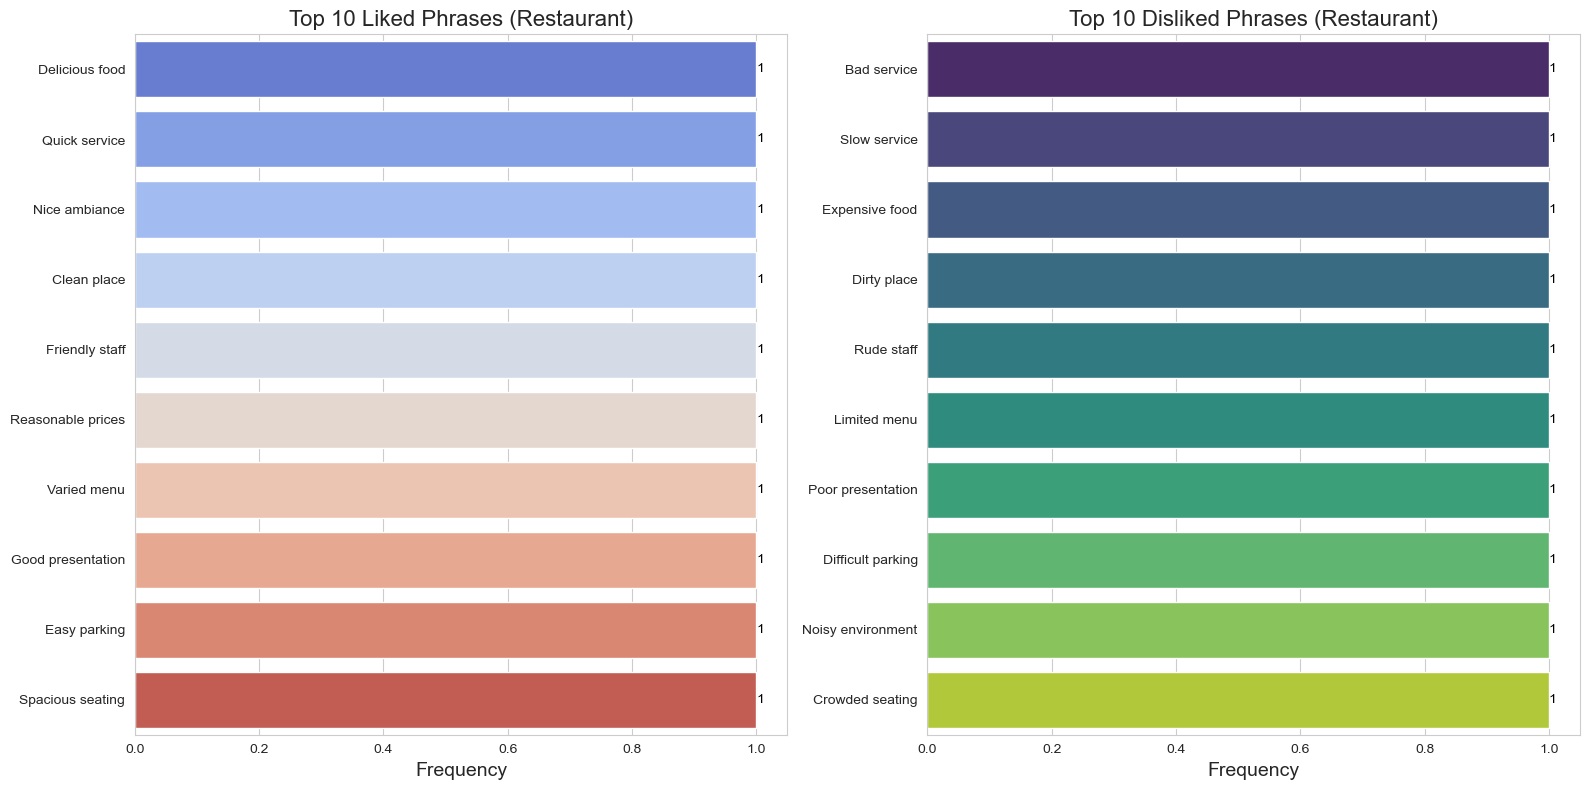

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pozitif ve negatif ifadeler
restaurant_positive_phrases = [
    "Delicious food",
    "Quick service",
    "Nice ambiance",
    "Clean place",
    "Friendly staff",
    "Reasonable prices",
    "Varied menu",
    "Good presentation",
    "Easy parking",
    "Spacious seating"
]

restaurant_negative_phrases = [
    "Bad service",
    "Slow service",
    "Expensive food",
    "Dirty place",
    "Rude staff",
    "Limited menu",
    "Poor presentation",
    "Difficult parking",
    "Noisy environment",
    "Crowded seating"
]

# Pozitif ve negatif ifadeler için veri çerçeveleri oluşturma
df_restaurant_positive_phrases = pd.DataFrame(restaurant_positive_phrases, columns=['Phrase'])
df_restaurant_positive_phrases['Frequency'] = 1  # Görselleştirme için basitleştirilmiş, gerçek durumda gerçek sayımlar olmalı

df_restaurant_negative_phrases = pd.DataFrame(restaurant_negative_phrases, columns=['Phrase'])
df_restaurant_negative_phrases['Frequency'] = 1  # Görselleştirme için basitleştirilmiş, gerçek durumda gerçek sayımlar olmalı

# Grafiklerin formatını değiştirme ve daha hoş bir görüntü sağlama
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Pozitif ifadeler bar plot
plt.subplot(1, 2, 1)
sns.barplot(x="Frequency", y="Phrase", data=df_restaurant_positive_phrases, palette="coolwarm")
plt.title('Top 10 Liked Phrases (Restaurant)', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('')
for index, value in enumerate(df_restaurant_positive_phrases['Frequency']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

# Negatif ifadeler bar plot
plt.subplot(1, 2, 2)
sns.barplot(x="Frequency", y="Phrase", data=df_restaurant_negative_phrases, palette="viridis")
plt.title('Top 10 Disliked Phrases (Restaurant)', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('')
for index, value in enumerate(df_restaurant_negative_phrases['Frequency']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.tight_layout()
plt.savefig("restaurant_phrases.png")
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [36]:
pr = PorterStemmer()

In [37]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [38]:
vect = CountVectorizer(ngram_range=(1,3), analyzer = lemmafn)

In [39]:
x = yelpbw['text']
y = yelpbw['stars']

In [40]:
x = vect.fit_transform(x)

In [41]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state =42, test_size=0.20)

In [42]:
l = LogisticRegression()
nb = MultinomialNB()

In [43]:
model = l.fit(x_train, y_train)

In [44]:
tahmin = model.predict(x_test)

In [45]:
accuracy_score(tahmin, y_test)

0.9678030303030303

In [46]:
model2 = nb.fit(x_train, y_train)

In [47]:
tahmin2 = model2.predict(x_test)

In [48]:
accuracy_score(tahmin2, y_test)

0.9554924242424242

In [49]:
data = pd.read_csv('restaurant.csv')

In [50]:
# 'date' sütununu datetime formatına çevir ve yılları çıkar
data['year'] = pd.to_datetime(data['date']).dt.year

In [51]:
# İlgilendiğiniz yıllara göre veriyi süz
filtered_data = data[data['year'].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]

In [52]:
# Her yıl için ortalama yıldız sayısını hesapla ve yazdır
average_stars = filtered_data.groupby('year')['stars'].mean()

In [53]:
average_stars

year
2012    3.899297
2013    3.930833
2014    3.809704
2015    3.870331
2016    3.613703
2017    3.685768
2018    3.714286
2019    3.807715
Name: stars, dtype: float64

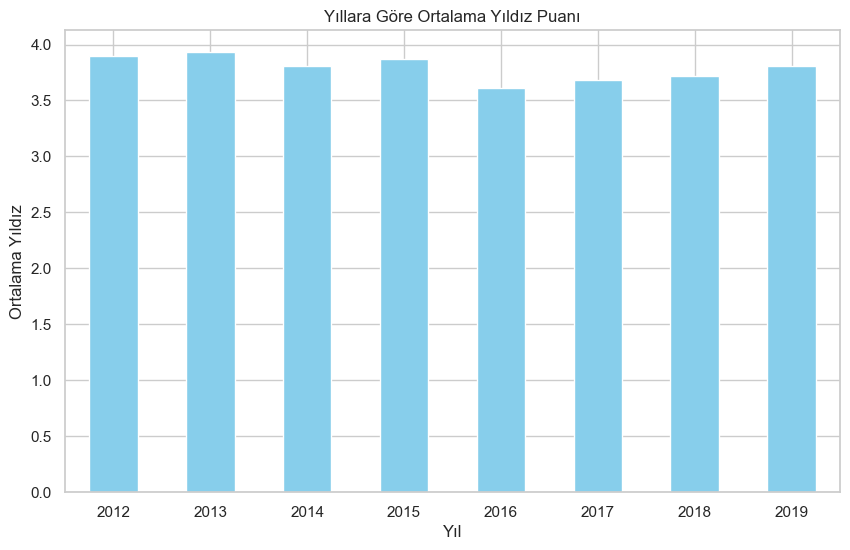

In [54]:
plt.figure(figsize=(10, 6))
average_stars.plot(kind='bar', color='skyblue')
plt.title('Yıllara Göre Ortalama Yıldız Puanı')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Yıldız')
plt.xticks(rotation=0) 
plt.show()